In [95]:
import numpy as np
from math import pi 
import scipy
from scipy import signal
from matplotlib import pyplot as plt

# Question 1

In [96]:
f1 = 900 #formant frequency
b1 = 200 #bandwith
fs = 16000 #sampling frequency
T = 1.0/fs #samples

## Computing the filter parameters

In [97]:
r = np.exp(-b1*pi*T)
r

0.9614911598014075

In [98]:
theta = 2*pi*f1*T
theta

0.3534291735288517

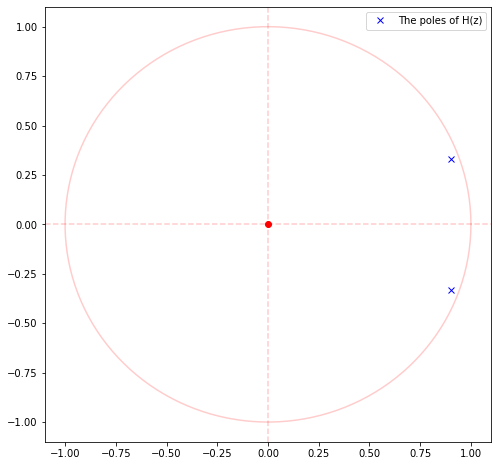

In [99]:
plt.figure(figsize=(8, 8))
plt.plot(r*np.cos(theta), r*np.sin(theta), 'bx')
plt.plot(r*np.cos(-theta), r*np.sin(-theta), 'bx')
angle = np.linspace( 0 , 2 * np.pi , 150 ) 

radius = 1

x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 
plt.plot(x, y, 'r', alpha = 0.2)

plt.axvline(0, c = 'r', ls='--', alpha=0.2)
plt.axhline(0, c = 'r', ls='--', alpha=0.2)
plt.plot(0, 0, 'ro')
plt.legend(["The poles of H(z)"])

In [100]:
def getFilterDenCoef(F1, B1, Fs):
    r, theta = np.exp(-b1*pi*T), 2*pi*f1*T
    return np.array([1, -2*r*np.cos(theta), r*r])

In [101]:
num = np.array([1])
den = getFilterDenCoef(f1, b1, fs)

In [102]:
den

array([ 1.        , -1.80412535,  0.92446525])

In [103]:
w, h = scipy.signal.freqz(b=num, a=den, fs = fs)

Text(0.5, 1.0, 'Magnitude plot of H(z) dB vs Frequency')

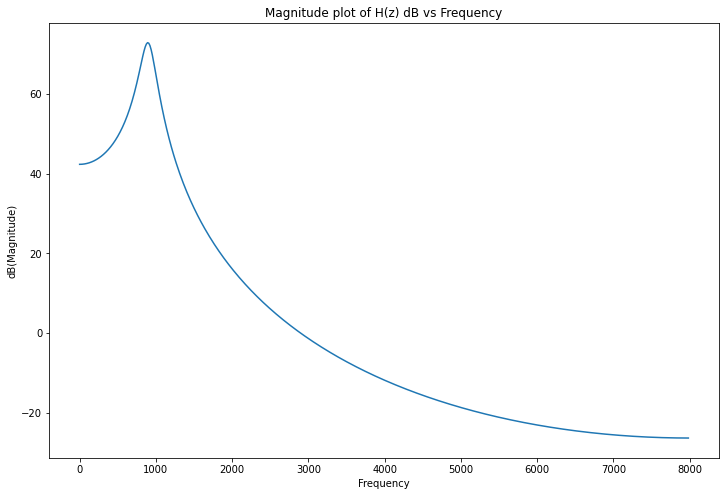

In [104]:
plt.figure(figsize=(12, 8))
plt.plot(w, 20*np.log(np.sqrt(h*np.conjugate(h))))
plt.xlabel("Frequency")
plt.ylabel("dB(Magnitude)")
plt.title("Magnitude plot of H(z) dB vs Frequency")

In [139]:
tout, yout = scipy.signal.dimpulse(system = (num,den,1), n=200)

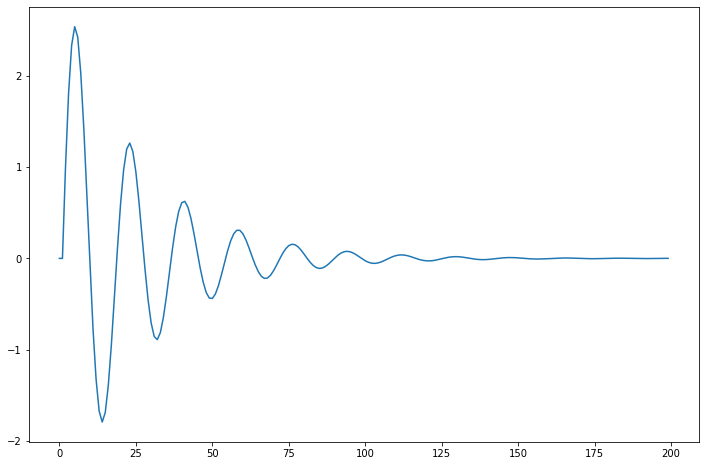

In [140]:
plt.figure(figsize=(12, 8))
#plt.plot(tout, 3*np.exp(-b1*pi*tout))
plt.plot(tout, np.squeeze(yout))

In [142]:
w, mag, phase = scipy.signal.dbode((num, den, 1))

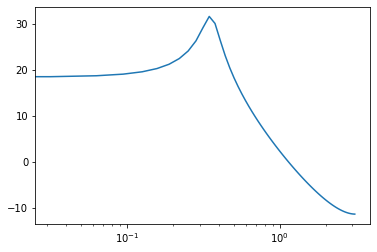

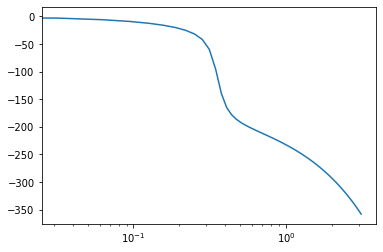

In [145]:
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [180]:
def computeImpRes(ini, samples, r, theta):
    #computing the impulse response from the difference equations
    y = np.zeros((samples, 1))
    y[0], y[1], y[2] = ini
    for i in range(3, samples):
        y[i] = 2*r*np.cos(theta)*y[i-1] - r*r*y[i-2]
    return y

In [177]:
yImp = computeImpRes([1, 2*r*np.cos(theta), 4*r*r*np.cos(theta)*np.cos(theta) - r*r], 100, r, theta)

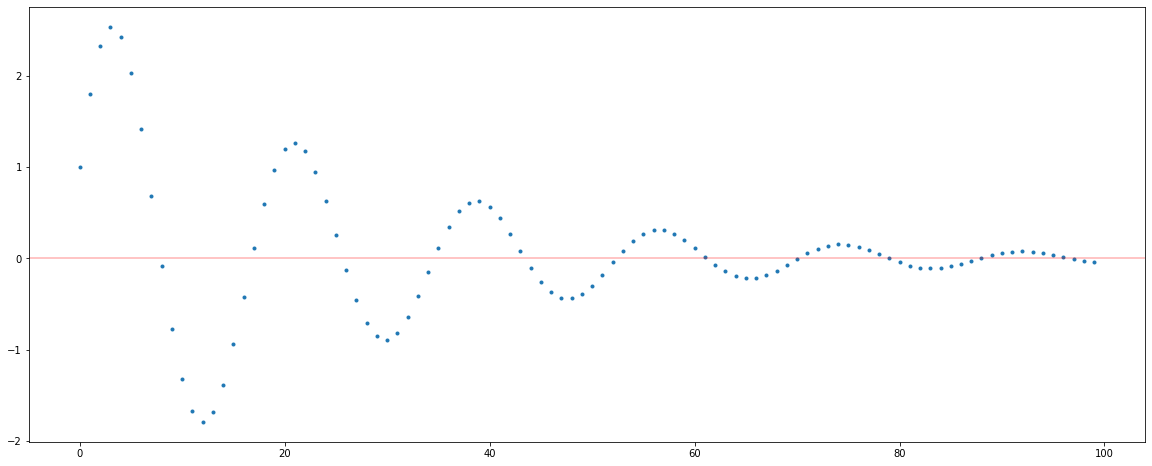

In [179]:
plt.figure(figsize=(20, 8))
plt.plot(yImp, '.')
plt.axhline(0, c = 'r', alpha=0.3)